# Data Wrangling

In this data wrangling exercise I did the following steps:

    1. Imported the data and converted it into a Pandas DataFrame
    
    2. Checked for null values and replaced them with the appropriate values based on their distributions
    
    3. Checked for other anomalies in the dataset and filtered out those columns 
    
    4. Did preliminary analysis on the data

In [ ]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('credit risk.csv')

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
df = df.rename(index=str, columns={"person_age":"Age", "person_income":"Income", "person_home_ownership":"home ownership", "person_emp_length":"Years_Employed","loan_intent":"intent","loan_amnt":"Amount","loan_int_rate":"Rate","loan_status":"Default","loan_percent_income":"Loan_Percent_Income","cb_person_default_on_file":"default on file","cb_person_cred_hist_length":"Credit_History","loan_grade":"grade"})

In [6]:
df.head()

,Age,Income,home ownership,Years_Employed,intent,grade,Amount,Rate,Default,Loan_Percent_Income,default on file,Credit_History
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

## Checking And Replacing Null Values

In [8]:
df.isnull().values.any()

True

In [10]:
na_df=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)).reset_index()
na_df.columns = ['VarName', 'NullCount']
na_df[(na_df['NullCount']>0)]

,VarName,NullCount
0,Rate,3116
1,Years_Employed,895


array([[<AxesSubplot:title={'center':'Rate'}>]], dtype=object)

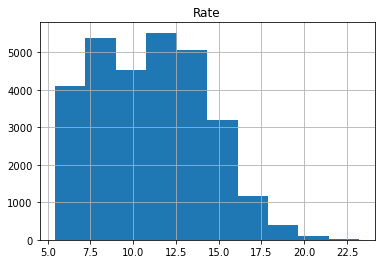

In [11]:
df.hist(column = 'Rate')

array([[<AxesSubplot:title={'center':'Years_Employed'}>]], dtype=object)

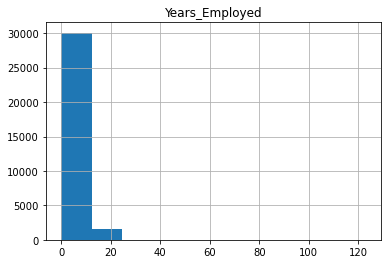

In [12]:
df.hist(column = 'Years_Employed')

Both the interest rate and years employed columns are left skewed. Therefore I will use median to fill in the null values in those columns.

In [14]:
df['Rate'].fillna((df['Rate'].median()), inplace=True)
df['Years_Employed'].fillna((df['Years_Employed'].median()), inplace=True)

In [15]:
print(df['Age'].value_counts())

23     3889
22     3633
24     3549
25     3037
26     2477
27     2138
28     1854
29     1687
30     1316
21     1229
31     1142
32      964
33      856
34      709
35      620
36      548
37      478
38      373
39      302
40      271
41      241
42      188
43      164
44      141
45      108
47       94
46       94
48       75
50       52
49       49
51       39
52       36
53       30
54       24
55       20
58       19
56       15
20       15
57       15
60       15
66        9
65        9
61        9
62        7
64        7
70        7
59        5
69        5
73        3
144       3
63        3
123       2
80        1
76        1
78        1
94        1
67        1
84        1
Name: Age, dtype: int64


It seems that there are borrowers in this dataset that are more than 100 years old. This is clearly an error and needs to fixed by filtering out those borrowers.

In [16]:
df = df[df['Age']<100]

In [17]:
print(df['Years_Employed'].value_counts())

0.000000      4105
2.000000      3848
3.000000      3456
5.000000      2946
1.000000      2915
4.000000      2872
6.000000      2666
7.000000      2195
8.000000      1687
9.000000      1367
4.789686       895
11.000000      740
10.000000      696
12.000000      574
13.000000      426
14.000000      335
15.000000      238
16.000000      165
17.000000      129
18.000000      104
19.000000       64
20.000000       42
21.000000       38
22.000000       19
24.000000       10
23.000000       10
25.000000        8
26.000000        6
27.000000        5
31.000000        4
28.000000        3
123.000000       2
30.000000        2
34.000000        1
29.000000        1
41.000000        1
38.000000        1
Name: Years_Employed, dtype: int64


For years employeed there borrowers who had more than 40 years of work experience. That is also a mistakes, and we need to filter columns in which borrowers had more than 40 years of work experience.

In [18]:
df = df[df['Years_Employed']<=40]

In [19]:
print(df['Years_Employed'].value_counts())

0.000000     4105
2.000000     3848
3.000000     3456
5.000000     2946
1.000000     2915
4.000000     2872
6.000000     2666
7.000000     2195
8.000000     1687
9.000000     1367
4.789686      895
11.000000     740
10.000000     696
12.000000     574
13.000000     426
14.000000     335
15.000000     238
16.000000     165
17.000000     129
18.000000     104
19.000000      64
20.000000      42
21.000000      38
22.000000      19
24.000000      10
23.000000      10
25.000000       8
26.000000       6
27.000000       5
31.000000       4
28.000000       3
30.000000       2
34.000000       1
38.000000       1
29.000000       1
Name: Years_Employed, dtype: int64


In [8]:
df.dtypes

Age                      int64
Income                   int64
home ownership          object
Years_Employed         float64
intent                  object
grade                   object
Amount                   int64
Rate                   float64
Default                  int64
Loan_Percent_Income    float64
default on file         object
Credit_History           int64
dtype: object

In [11]:
print(df)

       Age  Income home ownership  Years_Employed           intent grade  \
0       22   59000           RENT           123.0         PERSONAL     D   
1       21    9600            OWN             5.0        EDUCATION     B   
2       25    9600       MORTGAGE             1.0          MEDICAL     C   
3       23   65500           RENT             4.0          MEDICAL     C   
4       24   54400           RENT             8.0          MEDICAL     C   
...    ...     ...            ...             ...              ...   ...   
32576   57   53000       MORTGAGE             1.0         PERSONAL     C   
32577   54  120000       MORTGAGE             4.0         PERSONAL     A   
32578   65   76000           RENT             3.0  HOMEIMPROVEMENT     B   
32579   56  150000       MORTGAGE             5.0         PERSONAL     B   
32580   66   42000           RENT             2.0          MEDICAL     B   

       Amount   Rate  Default  Loan_Percent_Income default on file  \
0       35000  16

## Data Groupings

In [13]:
# average interest rate by loan intent

df2= df.set_index('intent').groupby('intent').mean()

intent = df2.Rate

print(intent)

intent
DEBTCONSOLIDATION    11.022421
EDUCATION            10.982582
HOMEIMPROVEMENT      11.225819
MEDICAL              11.079414
PERSONAL             11.020906
VENTURE              10.978850
Name: Rate, dtype: float64


In [14]:
# average income by home ownership type

df3= df.set_index('home ownership').groupby('home ownership').mean()

income = df3.Income

print(income)

home ownership
MORTGAGE    81602.937632
OTHER       79079.861702
OWN         59549.615420
RENT        55511.111333
Name: Income, dtype: float64


In [16]:
# average interest by ownership type

avg_int_ownership = df3.Rate

print(avg_int_ownership)

home ownership
MORTGAGE    10.525132
OTHER       12.030638
OWN         10.963855
RENT        11.462372
Name: Rate, dtype: float64


In [17]:
# average loan balance by ownership type

avg_bal_ownership = df3.Amount

print(avg_bal_ownership)

home ownership
MORTGAGE    10635.755444
OTHER       11128.989362
OWN          9130.748175
RENT         8931.989210
Name: Amount, dtype: float64


In [18]:
df4= df.set_index('grade').groupby('grade').mean()

age_grade = df4.Age

print(age_grade)

grade
A    27.673793
B    27.661239
C    27.771714
D    27.931342
E    27.744828
F    28.392344
G    28.322034
Name: Age, dtype: float64


In [19]:
rate_grade = df4.Rate
print(rate_grade)

grade
A     7.347094
B    11.002471
C    13.453041
D    15.348901
E    17.005655
F    18.597321
G    20.251525
Name: Rate, dtype: float64


In [21]:
grade_income = df4.Income
print(grade_income)

grade
A    67028.700596
B    66796.502240
C    65847.889454
D    64242.658559
E    71174.186207
F    80079.229665
G    78994.898305
Name: Income, dtype: float64


In [22]:
grade_amount = df4.Amount
print(grade_amount)

grade
A     8578.626888
B    10056.633155
C     9300.596596
D    10879.302648
E    12929.109195
F    15308.014354
G    18141.949153
Name: Amount, dtype: float64


In [39]:
df5= df.set_index('Default').groupby('Default').mean()

In [40]:
# average age of default

age_Default = df5.Age

print(age_Default)

Default
0    27.807129
1    27.474676
Name: Age, dtype: float64


In [41]:
income_Default = df5.Income
print(income_Default)

Default
0    70804.361559
1    49125.652223
Name: Income, dtype: float64


In [42]:
rate_Default = df5.Rate
print(rate_Default)

Default
0    10.435999
1    13.060207
Name: Rate, dtype: float64


In [43]:
amount_Default = df5.Amount

print(amount_Default)

Default
0     9237.464178
1    10850.502954
Name: Amount, dtype: float64


In [53]:
df5.head()

,Age,Income,Years Employed,Amount,Rate,Loan_Percent_Income,Credit History(Years)
Default,,,,,,,
0,27.807129,70804.361559,4.968745,9237.464178,10.435999,0.148805,5.837475
1,27.474676,49125.652223,4.137562,10850.502954,13.060207,0.246889,5.685003
